### YASHASVI VERMA

Exploratory Data Analysis on Terrorism Dataset 

 
Finding out most terrorism affected places and analysis of terrorist strategy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ds = pd.read_csv('C:\Datasets\globalterrorismdb_0718dist.csv',encoding='latin1')

C:\Users\rituv\.conda\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
ds.head(1)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [5]:
ds.shape

(181691, 135)

Checking null values

In [6]:
ds.isnull().sum().sort_values()

eventid                  0
crit3                    0
success                  0
suicide                  0
attacktype1              0
                     ...  
weaptype4_txt       181618
weaptype4           181618
weapsubtype4        181621
weapsubtype4_txt    181621
gsubname3           181671
Length: 135, dtype: int64

In [7]:
ds.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [8]:
ds = ds[['iyear','imonth','iday','gname','country_txt','region_txt','provstate','city','latitude','longitude','summary','attacktype1_txt','targtype1_txt','weaptype1_txt','nkill','nwound']]

In [9]:
ds.head(3)

,iyear,imonth,iday,gname,country_txt,region_txt,provstate,city,latitude,longitude,summary,attacktype1_txt,targtype1_txt,weaptype1_txt,nkill,nwound
0,1970,7,2,MANO-D,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,Assassination,Private Citizens & Property,Unknown,1.0,0.0
1,1970,0,0,23rd of September Communist League,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,0.0,0.0
2,1970,1,0,Unknown,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,Assassination,Journalists & Media,Unknown,1.0,0.0


In [10]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            181691 non-null  int64  
 1   imonth           181691 non-null  int64  
 2   iday             181691 non-null  int64  
 3   gname            181691 non-null  object 
 4   country_txt      181691 non-null  object 
 5   region_txt       181691 non-null  object 
 6   provstate        181270 non-null  object 
 7   city             181257 non-null  object 
 8   latitude         177135 non-null  float64
 9   longitude        177134 non-null  float64
 10  summary          115562 non-null  object 
 11  attacktype1_txt  181691 non-null  object 
 12  targtype1_txt    181691 non-null  object 
 13  weaptype1_txt    181691 non-null  object 
 14  nkill            171378 non-null  float64
 15  nwound           165380 non-null  float64
dtypes: float64(4), int64(3), object(9)
mem

In [11]:
ds.isnull().sum().sort_values()

iyear                  0
imonth                 0
iday                   0
gname                  0
country_txt            0
region_txt             0
attacktype1_txt        0
targtype1_txt          0
weaptype1_txt          0
provstate            421
city                 434
latitude            4556
longitude           4557
nkill              10313
nwound             16311
summary            66129
dtype: int64

In [12]:
ds['nwound'] = ds['nwound'].fillna(0)
ds['nkill'] = ds['nkill'].fillna(0)
ds['summary'] = ds['summary'].fillna('Summary Not provided')

In [13]:
ds.isnull().sum().sort_values()

iyear                 0
imonth                0
iday                  0
gname                 0
country_txt           0
region_txt            0
summary               0
attacktype1_txt       0
targtype1_txt         0
weaptype1_txt         0
nkill                 0
nwound                0
provstate           421
city                434
latitude           4556
longitude          4557
dtype: int64

In [14]:
ds.head(50)

,iyear,imonth,iday,gname,country_txt,region_txt,provstate,city,latitude,longitude,summary,attacktype1_txt,targtype1_txt,weaptype1_txt,nkill,nwound
0,1970,7,2,MANO-D,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,Summary Not provided,Assassination,Private Citizens & Property,Unknown,1.0,0.0
1,1970,0,0,23rd of September Communist League,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,Summary Not provided,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,0.0,0.0
2,1970,1,0,Unknown,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,Summary Not provided,Assassination,Journalists & Media,Unknown,1.0,0.0
3,1970,1,0,Unknown,Greece,Western Europe,Attica,Athens,37.997490,23.762728,Summary Not provided,Bombing/Explosion,Government (Diplomatic),Explosives,0.0,0.0
4,1970,1,0,Unknown,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,Summary Not provided,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,0.0,0.0
5,1970,1,1,Black Nationalists,United States,North America,Illinois,Cairo,37.005105,-89.176269,1/1/1970: Unknown African American assailants ...,Armed Assault,Police,Firearms,0.0,0.0
6,1970,1,2,Tupamaros (Uruguay),Uruguay,South America,Montevideo,Montevideo,-34.891151,-56.187214,Summary Not provided,Assassination,Police,Firearms,0.0,0.0
7,1970,1,2,Unknown,United States,North America,California,Oakland,37.791927,-122.225906,1/2/1970: Unknown perpetrators detonated explo...,Bombing/Explosion,Utilities,Explosives,0.0,0.0
8,1970,1,2,New Year's Gang,United States,North America,Wisconsin,Madison,43.076592,-89.412488,"1/2/1970: Karl Armstrong, a member of the New ...",Facility/Infrastructure Attack,Military,Incendiary,0.0,0.0
9,1970,1,3,New Year's Gang,United States,North America,Wisconsin,Madison,43.072950,-89.386694,"1/3/1970: Karl Armstrong, a member of the New ...",Facility/Infrastructure Attack,Government (General),Incendiary,0.0,0.0


In [15]:
ds['Casualities'] = ds['nkill'] + ds['nwound']

In [16]:
year = ds['iyear'].unique()

In [17]:
years_count = ds['iyear'].value_counts(dropna = False).sort_index()

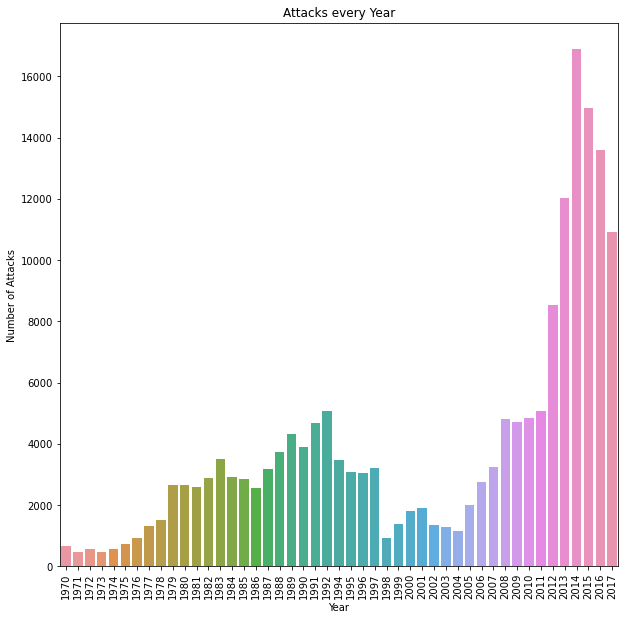

In [18]:
plt.figure(figsize = (10,10))
sns.barplot(x = year, y = years_count)
plt.xticks(rotation = 90)
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Attacks every Year')
plt.show()

In [19]:
month = ds['imonth'].unique()
month_count = ds['imonth'].value_counts(dropna = False).sort_index()

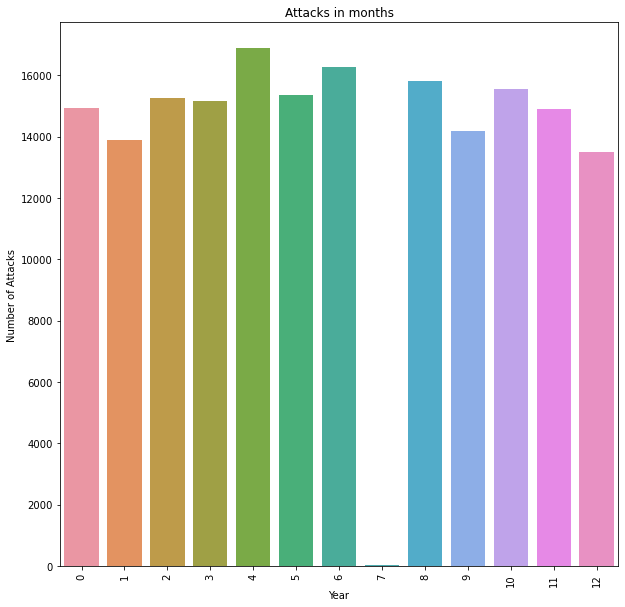

In [20]:
plt.figure(figsize = (10,10))
sns.barplot(x = month, y = month_count)
plt.xticks(rotation = 90)
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Attacks in months')
plt.show()

In [21]:
day = ds['iday'].unique()
day_count = ds['iday'].value_counts(dropna = False).sort_index()

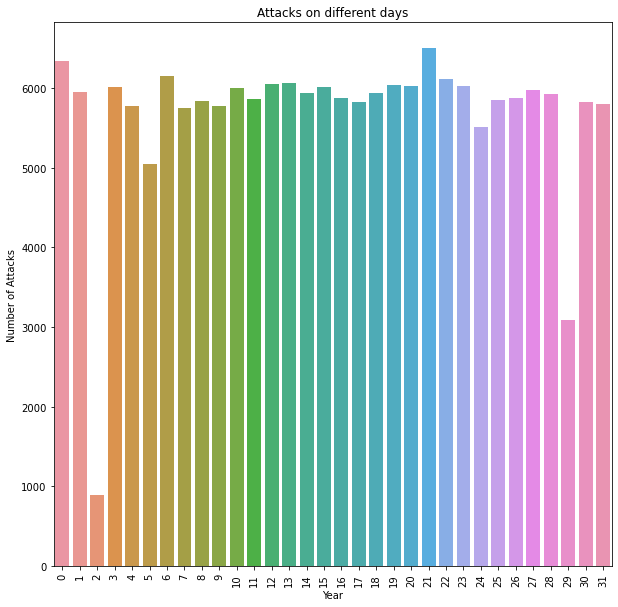

In [22]:
plt.figure(figsize = (10,10))
sns.barplot(x = day, y = day_count)
plt.xticks(rotation = 90)
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Attacks on different days')
plt.show()

In [23]:
ds['country_txt'].describe()

count     181691
unique       205
top         Iraq
freq       24636
Name: country_txt, dtype: object

In [24]:
attacks_by_country = ds['country_txt'].value_counts()[0:20]

In [25]:
other_countries = ds['country_txt'].value_counts()[21:205]

Text(0.5, 1.0, 'Attacks in different countries')

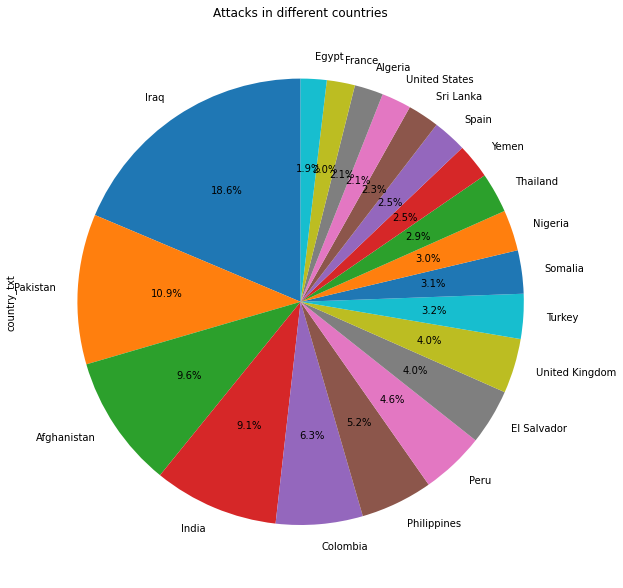

In [26]:
attacks_by_country.plot(kind='pie',figsize = (10,15),autopct='%1.1f%%',startangle=90)
plt.title('Attacks in different countries')

In [27]:
print('Attacks by top 20 countries are', attacks_by_country.sum(), 'and total attacks by other 185 countries are', other_countries.sum(), 'which is a big difference') 

Attacks by top 20 countries are 132119 and total attacks by other 185 countries are 47094 which is a big difference


In [28]:
print('The countries which has most number of attacks are :\n', ds['country_txt'].value_counts()[0:5])

The countries which has most number of attacks are :
 Iraq           24636
Pakistan       14368
Afghanistan    12731
India          11960
Colombia        8306
Name: country_txt, dtype: int64


In [51]:
ds['city'].describe()

count      181257
unique      36674
top       Unknown
freq         9775
Name: city, dtype: object

In [56]:
attacks_on_city = ds['city'].value_counts()[0:10]

Text(0.5, 1.0, 'Attacks in different cities')

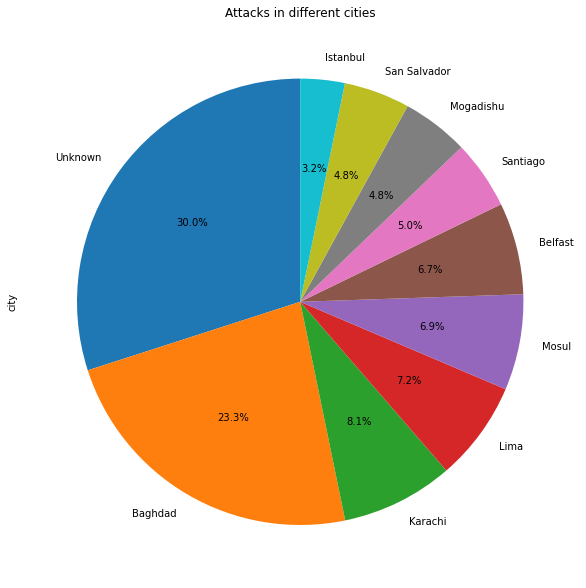

In [57]:
attacks_on_city.plot(kind='pie',figsize = (10,15),autopct='%1.1f%%',startangle=90)
plt.title('Attacks in different cities')

In [58]:
attacks_on_city

Unknown         9775
Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Name: city, dtype: int64

In [29]:
region = ds['region_txt'].value_counts()

<AxesSubplot:xlabel='iyear'>

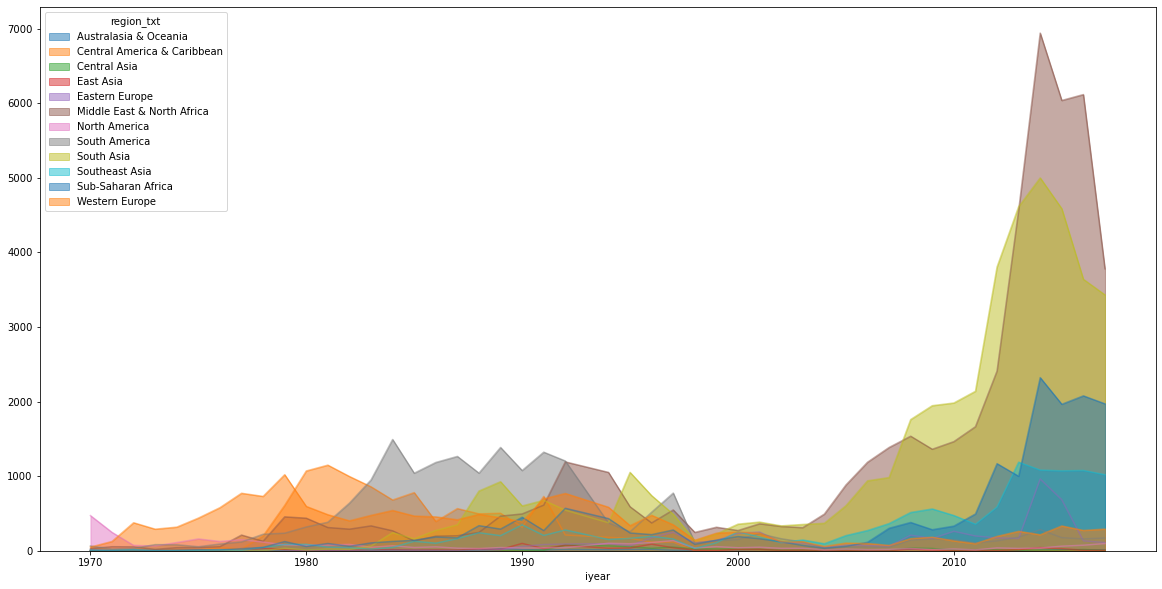

In [30]:
pd.crosstab(ds['iyear'], ds['region_txt']).plot(kind='area',stacked=False,figsize=(20,10))

<AxesSubplot:xlabel='iyear'>

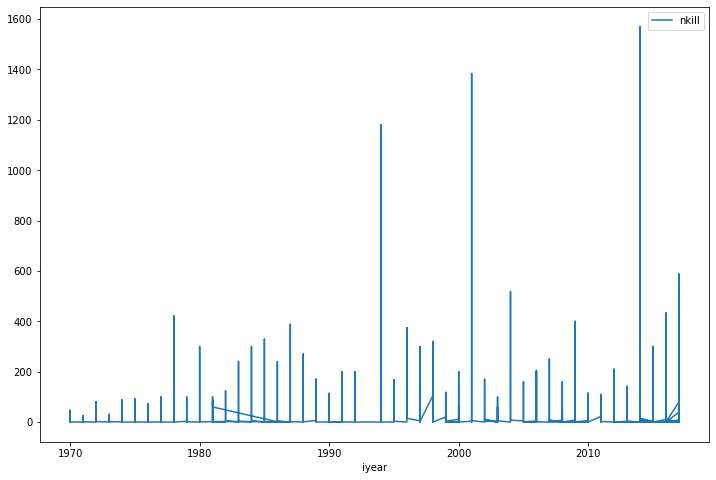

In [31]:
ds.plot(x ='iyear', y = 'nkill', figsize = (12,8))

(array([-25000.,      0.,  25000.,  50000.,  75000., 100000., 125000.,
        150000., 175000., 200000.]),
 [Text(-25000.0, 0, 'Sub-Saharan Africa'),
  Text(0.0, 0, 'Central America & Caribbean'),
  Text(25000.0, 0, 'Central America & Caribbean'),
  Text(50000.0, 0, 'Western Europe'),
  Text(75000.0, 0, 'South Asia'),
  Text(100000.0, 0, 'Southeast Asia'),
  Text(125000.0, 0, 'Sub-Saharan Africa'),
  Text(150000.0, 0, 'Sub-Saharan Africa'),
  Text(175000.0, 0, 'Middle East & North Africa'),
  Text(200000.0, 0, '')])

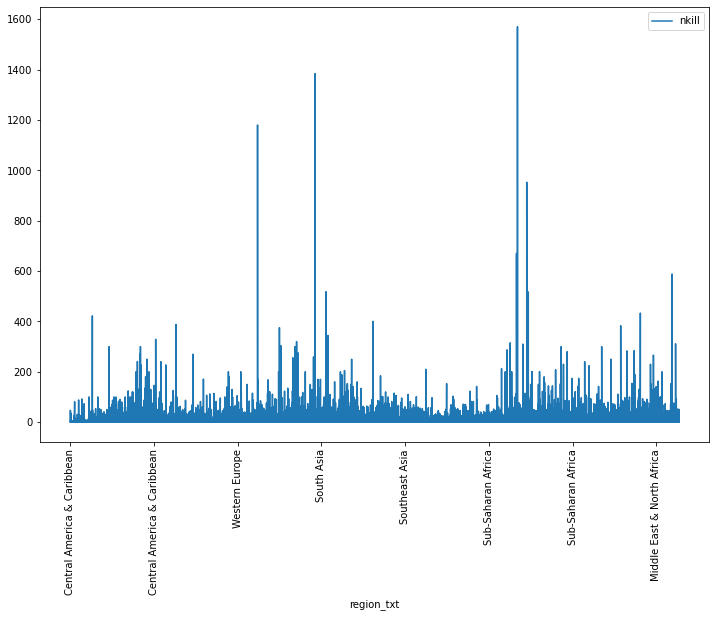

In [32]:
ds.plot(x = 'region_txt', y = 'nkill', figsize = (12,8))
plt.xticks(rotation = 90)

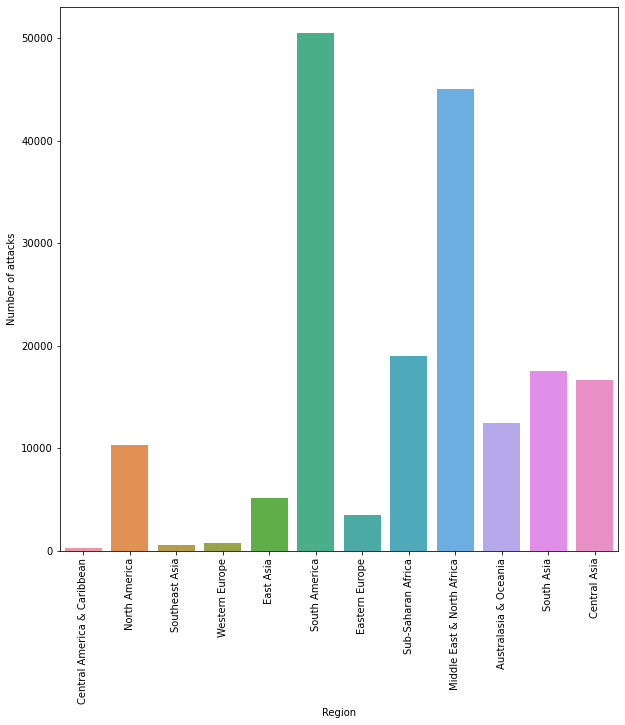

In [59]:
Reg_type = ds['region_txt'].unique()
Reg_type_count = ds['region_txt'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (10,10))
sns.barplot(x = Reg_type, y = Reg_type_count)
plt.xticks(rotation = 90)
plt.ylabel('Number of attacks')
plt.xlabel('Region')
plt.show()

In [36]:
Attack_type = ds['attacktype1_txt'].unique()
Attack_type_count = ds['attacktype1_txt'].value_counts(dropna = False).sort_index()

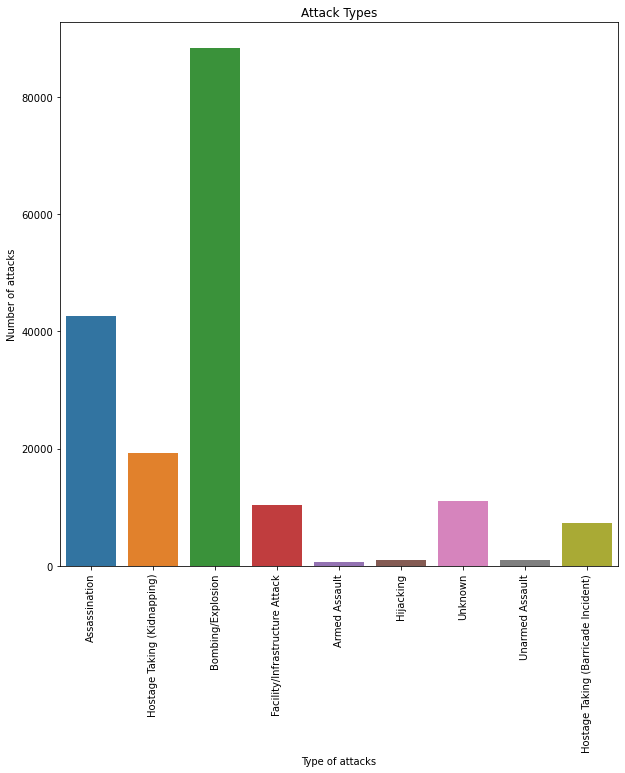

In [39]:
plt.figure(figsize = (10,10))
sns.barplot(x = Attack_type, y = Attack_type_count)
plt.xticks(rotation = 90)
plt.ylabel('Number of attacks')
plt.xlabel('Type of attacks')
plt.title('Attack Types')
plt.show()

In [40]:
Target_type = ds['targtype1_txt'].unique()
Target_type_count = ds['targtype1_txt'].value_counts(dropna = False).sort_index()

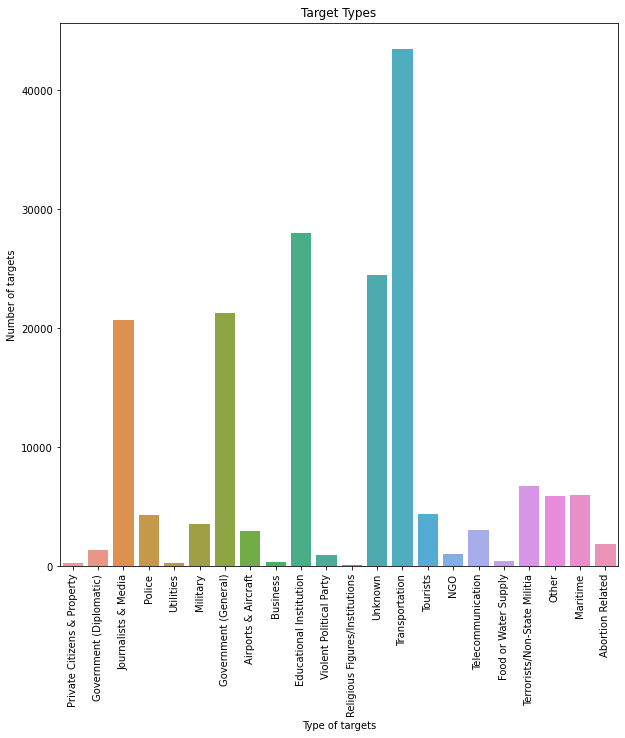

In [48]:
plt.figure(figsize = (10,10))
sns.barplot(x = Target_type, y = Target_type_count)
plt.xticks(rotation = 90)
plt.ylabel('Number of targets')
plt.xlabel('Type of targets')
plt.title('Target Types')
plt.show()

In [45]:
Waepon_type = ds['weaptype1_txt'].unique()
Weapon_type_count = ds['weaptype1_txt'].value_counts(dropna = False).sort_index()

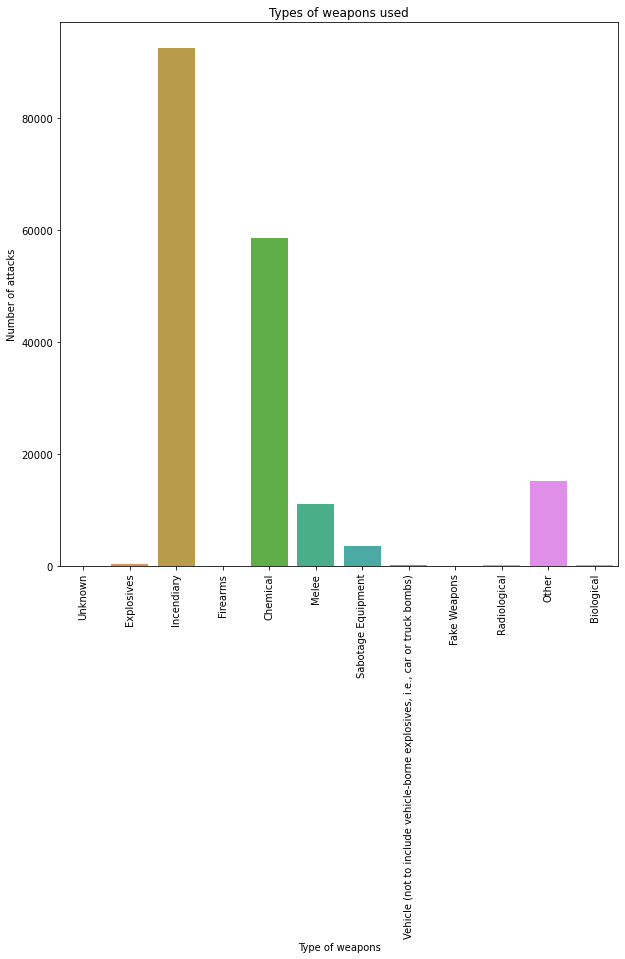

In [49]:
plt.figure(figsize = (10,10))
sns.barplot(x = Waepon_type, y = Weapon_type_count)
plt.xticks(rotation = 90)
plt.ylabel('Number of attacks')
plt.xlabel('Type of weapons')
plt.title('Types of weapons used')
plt.show()

# Observations and Conclusion

### Hot zones of terrorism are : 
       
Iraq with 24636 attacks       
Pakistan with 14368 attacks       
Afghanistan with 12731 attacks        
India with 11960 attacks         
Colombia with 8306 attacks          

There were more than 16000 attacks in the year 2014 now the attacks have been decreasing slowly        
it has decressed at a linear rate in 2017 there were nearly 11000 attacks

Most number of attacks were in the month of april and june and least or negligible in july

Dates mostly doesn't affects the number of attacks but the attacks were least on 2nd day of month

Attacks by top 20 countries are 132119 and total attacks by other 185 countries collectively are 47094 which is a big difference so these countries have always been under terrorism and unsafe compared to other countries 

The most attacked cities are : 

Unknown         9775   
Baghdad         7589    
Karachi         2652       
Lima            2359     
Mosul           2265        
Belfast         2171      
Santiago        1621      
Mogadishu       1581     
San Salvador    1558      
Istanbul        1048      

The most common type of attack is Bombing and explosion 

Most terrorism is in South America and Middle east & North africa    
Least terrorism is in Central America

The most common target type is transportation, so mostly attacks are done in transport vehicals and places  
and most common weapons used are incendiary and chemicals 

So to avoid and prevent such attacks in future, the most targetted countries should be kept safer 

And as transportation is the most common way of attacking, so it should be treated as a priority to decrease the number of attacks, use of chemicals and incendiary that is flamable objects should be restricted nearby.

Use of chemicals and incendiary, bombing and explosions should be prevented by restrictions and more strict rules.   
There must be machines to detect these objects specially at public gathering and transportation in most affected countries.

-------------------------------------------------------------------------------------------END------------------------------------------------------------------------------------------------------------